In [11]:
from qiskit import *

In [12]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

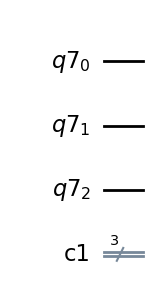

In [13]:
qc.draw('mpl')

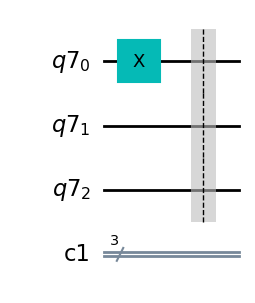

In [14]:
# apply the x gate to the first qubit
qc.x(qr[0])
qc.barrier()
qc.draw('mpl')

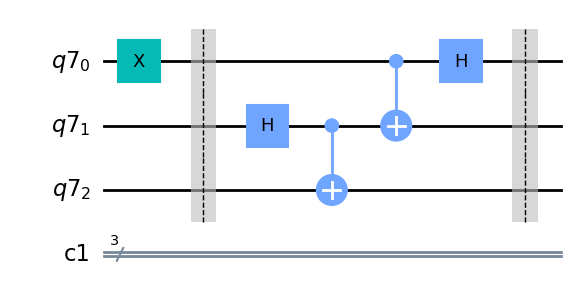

In [15]:
# entangle q1 with q2 and cx q0 with q1 followed with a h to q0
qc.h(qr[1])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.barrier()
qc.draw('mpl')

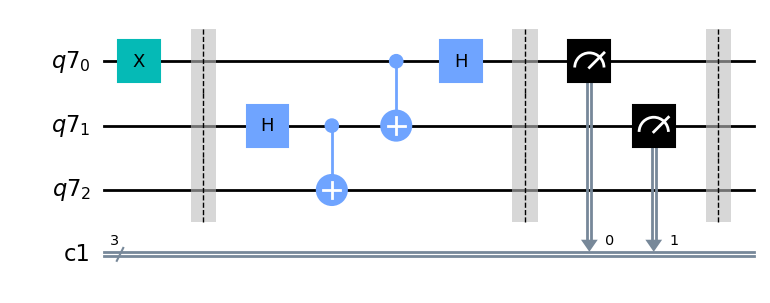

In [16]:
qc.measure([qr[0], qr[1]], [cr[0], cr[1]])
qc.barrier()
qc.draw('mpl')

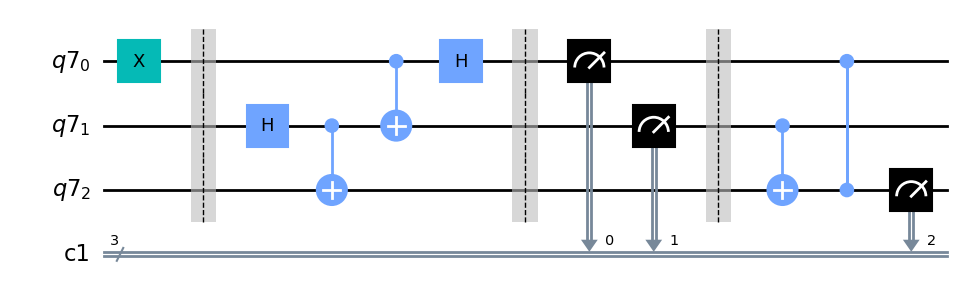

In [17]:
qc.cx(qr[1], qr[2])
qc.cz(qr[0], qr[2])
qc.measure(qr[2], cr[2])
qc.draw('mpl')

In [18]:
qc.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░            
q7_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■────
      └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q7_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼────
            ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q7_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─┤M├
            ░      └───┘           ░  ║  ║  ░ └───┘   └╥┘
c1_0: ════════════════════════════════╩══╬═════════════╬═
                                         ║             ║ 
c1_1: ═══════════════════════════════════╩═════════════╬═
                                                       ║ 
c1_2: ═════════════════════════════════════════════════╩═

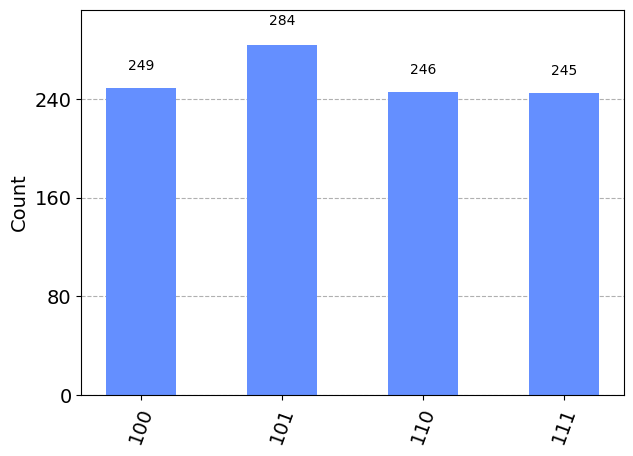

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()
counts = result.get_counts(qc)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [20]:
print(counts)

{'111': 245, '100': 249, '110': 246, '101': 284}
